# Code for HW2 APM598
- Author: Jieshu Wang (jwang490@asu.edu)
- Feb 2020
- Two-layer linear neural networks and CNN (Convolutional Neural Networks)
- need to import HW2_util.py

## Ex 1. a) Two-layer NN with four data points

In [9]:
# 1. Two-layers Neural Networks
# ex1. a) find parameters that satisfies the four data points. 
from torch.utils.data import TensorDataset
import torch
from HW2_util import ModuleParams as MyParams, TwoLayerReluClassificationModel as LinearModel, MyNNTrainer as MyTrainer

training_data_x_ex1a = [[1,0],
                        [-1,0],
                        [0,1],
                        [0,-1]]
training_data_y_ex1a = [0,0,1,1]
training_data_ex1a = TensorDataset(torch.as_tensor(training_data_x_ex1a, dtype=float),
                              torch.as_tensor(training_data_y_ex1a, dtype=torch.long))

ex1a_params = MyParams(learning_rate=0.01, batch_size=4, optimizer='Adam', 
                       num_epoch=300, good_parameter_threshold=0.9)

ex1a_model = MyTrainer(LinearModel, ex1a_params, training_data_ex1a)
ex1a_df = ex1a_model.result

-- epoch 0 --
    loss: 0.7340
    accuracy: 0.5000
-- epoch 60 --
    loss: 0.5436
    accuracy: 0.7500
-- epoch 120 --
    loss: 0.1625
    accuracy: 1.0000
-- epoch 180 --
    loss: 0.0557
    accuracy: 1.0000
-- epoch 240 --
    loss: 0.0294
    accuracy: 1.0000
300 trainings is finished! Spent time 0.5939559936523438 seconds.
Final training loss: 0.0188
Final training accuracy: 1.0000


## Ex 1. a) continue:
- Plot the loss and accuracy
- Print the good parameters that perform at least 90% accurate

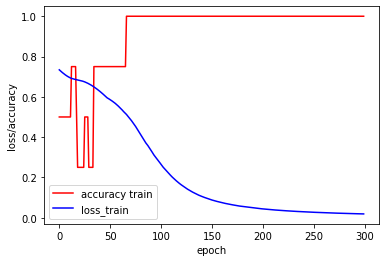


 The parameters that perform with (at least) 90.0% accuracy are:

-- epoch 66.0: (accuracy, loss): (1.0000, 0.5125)
    _model.0.weight
    Parameter containing:
tensor([[ 2.3722e+00, -1.1418e-03],
        [-2.3012e+00,  9.9305e-06]], requires_grad=True)
    _model.0.bias
    Parameter containing:
tensor([-0.0013, -0.0027], requires_grad=True)
    _model.2.weight
    Parameter containing:
tensor([[ 1.6330,  1.2265],
        [-1.8264, -2.4251]], requires_grad=True)
    _model.2.bias
    Parameter containing:
tensor([-1.5135,  2.0175], requires_grad=True)

-- epoch 67.0: (accuracy, loss): (1.0000, 0.5063)
    _model.0.weight
    Parameter containing:
tensor([[ 2.3722e+00, -1.1418e-03],
        [-2.3012e+00,  9.9305e-06]], requires_grad=True)
    _model.0.bias
    Parameter containing:
tensor([-0.0013, -0.0027], requires_grad=True)
    _model.2.weight
    Parameter containing:
tensor([[ 1.6330,  1.2265],
        [-1.8264, -2.4251]], requires_grad=True)
    _model.2.bias
    Parameter con

In [10]:
# ex1. a) continue
# plot the loss and accuracy 
from HW2_util import plot_loss_accuracy, print_good_parameters

plot_loss_accuracy(ex1a_df, include_test=False)
print_good_parameters(ex1a_df, ex1a_params)

## Ex 1. b) Two-layer NN with many data points

In [24]:
# ex1. b) provide accuracy of the two-layer nn for the dataset

import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

training_df_ex1b = pd.read_csv('./data/data_HW2_ex1.csv')
X = np.column_stack((training_df_ex1b['x1'].values, training_df_ex1b['x2'].values))
y = training_df_ex1b['class'].values - 1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
training_set = TensorDataset(torch.as_tensor(x_train, dtype=float), torch.as_tensor(y_train, dtype=torch.long))
test_set = TensorDataset(torch.as_tensor(x_test, dtype=float), torch.as_tensor(y_test, dtype=torch.long))

ex1b_params = MyParams(learning_rate=0.01, batch_size=10, optimizer='Adam', num_epoch=50, good_parameter_threshold=0.9)
ex1b_trainer = MyTrainer(LinearModel, ex1b_params, training_set, test_set)
ex1b_df = ex1b_trainer.result

-- epoch 0 --
    loss (train, test): 0.7124, 0.6914
    accuracy (train, test): 0.5062, 0.4750
-- epoch 10 --
    loss (train, test): 0.5302, 0.5130
    accuracy (train, test): 0.6937, 0.7250
-- epoch 20 --
    loss (train, test): 0.2550, 0.2481
    accuracy (train, test): 0.9187, 0.9250
-- epoch 30 --
    loss (train, test): 0.2088, 0.1988
    accuracy (train, test): 0.9125, 0.9250
-- epoch 40 --
    loss (train, test): 0.1956, 0.1867
    accuracy (train, test): 0.9187, 0.9250
50 trainings is finished! Spent time 0.6358139514923096 seconds.
Final loss (train, test): 0.1911, 0.1885
Final accuracy (train, test): 0.9187, 0.9250


## Ex 1. b) continue:
- Plot the loss and accuracy
- Print the good parameters that perform at least 90% accurate

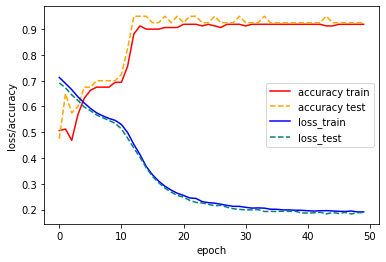


 The parameters that perform with (at least) 90.0% accuracy are:

-- epoch 13.0: (accuracy, loss): (0.9125, 0.4130)
    _model.0.weight
    Parameter containing:
tensor([[-0.2642,  2.3537],
        [ 0.3514, -2.7295]], requires_grad=True)
    _model.0.bias
    Parameter containing:
tensor([-0.3517, -0.9079], requires_grad=True)
    _model.2.weight
    Parameter containing:
tensor([[-1.0339, -1.8608],
        [ 1.8832,  1.7199]], requires_grad=True)
    _model.2.bias
    Parameter containing:
tensor([ 1.2257, -2.1709], requires_grad=True)

-- epoch 14.0: (accuracy, loss): (0.9000, 0.3671)
    _model.0.weight
    Parameter containing:
tensor([[-0.2642,  2.3537],
        [ 0.3514, -2.7295]], requires_grad=True)
    _model.0.bias
    Parameter containing:
tensor([-0.3517, -0.9079], requires_grad=True)
    _model.2.weight
    Parameter containing:
tensor([[-1.0339, -1.8608],
        [ 1.8832,  1.7199]], requires_grad=True)
    _model.2.bias
    Parameter containing:
tensor([ 1.2257, -2.170

In [25]:
# ex1. b) continue, plot and print the results

plot_loss_accuracy(ex1b_df, include_test=True)
print_good_parameters(ex1b_df, ex1b_params)

## Ex 2. N.N. Approximate functions
### Ex 2. c) write a program that returns a two layer n.n.

In [26]:
# ex2c
from dataclasses import dataclass

# generate random data points
number_data = 30  # number of points
y_start, y_stop = 0.0, 5.0
x_data_2c = np.sort(np.random.rand(number_data))
x_data_2c_tensor = torch.as_tensor(x_data_2c, dtype=float)
y_data_2c = (y_stop-y_start)*np.random.rand(number_data) + y_start
y_data_2c_tensor = torch.as_tensor(y_data_2c)
y_data_2c_tensor = y_data_2c_tensor.float().view(number_data,1)
training_data_ex2c = TensorDataset(x_data_2c_tensor, y_data_2c_tensor)

def find_params(x, y):
    w1 = [1.0 for i in x]
    b1 = [-i for i in x]
    b2 = y[0]
    w1_mat, b1_mat = np.mat(w1), np.mat(b1).T
    b1_mat_repeat = np.repeat(b1_mat, len(x), axis=1)
    x_mat, y_mat = np.mat(x), np.mat(y)
    z_mat = w1_mat.T@x_mat
    z_mat += b1_mat_repeat
    z_mat_relu = np.mat(np.where(z_mat<0, 0, z_mat)).T
    y_b = (y_mat-b2).T
    w2_mat = np.linalg.pinv(z_mat_relu)@y_b
    w2 = np.asarray(w2_mat)
    return w1, b1, w2, b2

w1, b1, w2, b2 = find_params(x_data_2c, y_data_2c)


### Ex2. c) test how well the parameters I just found approximate the data points. 

In [27]:
print('The errors of each data points are:')
for i in range(number_data):
    z = [max(0, x_data_2c[i]+b1[j]) for j in range(number_data)]
    score = sum([z[j]*w2[j] for j in range(number_data)]) + b2
    error = float(score - y_data_2c[i])
    print(f'{error:.4f}')

The errors of each data points are:
0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000


## Ex 3. CNN with Fashion-MNIST dataset
- the best accuracy on test set is ___0.8916___

In [31]:
# ex3. CNN
from torchvision import datasets
import torchvision.transforms as transforms
from HW2_util import CNNNet as MyCNN

MNIST_training_set = datasets.FashionMNIST('./data/HW2/data_sets', train=True, download=True, transform=transforms.ToTensor())
MNIST_test_set = datasets.FashionMNIST('./data/HW2/data_sets', train=False, download=True, transform=transforms.ToTensor())

my_parameters = MyParams(drop_out_rate=0.2, num_epoch=10, learning_rate=0.001)
cnn_trainer = MyTrainer(MyCNN, my_parameters, MNIST_training_set, MNIST_test_set)
cnn_df = cnn_trainer.result

-- epoch 0 --
    loss (train, test): 0.5480, 0.4208
    accuracy (train, test): 0.8026, 0.8492
-- epoch 2 --
    loss (train, test): 0.3667, 0.3462
    accuracy (train, test): 0.8690, 0.8755
-- epoch 4 --
    loss (train, test): 0.3265, 0.3260
    accuracy (train, test): 0.8825, 0.8812
-- epoch 6 --
    loss (train, test): 0.3103, 0.3116
    accuracy (train, test): 0.8871, 0.8883
-- epoch 8 --
    loss (train, test): 0.2971, 0.3017
    accuracy (train, test): 0.8926, 0.8894
10 trainings is finished! Spent time 167.53621697425842 seconds.
Final loss (train, test): 0.2954, 0.3021
Final accuracy (train, test): 0.8926, 0.8916


## Ex 3. continue:
- Plot the loss and accuracy

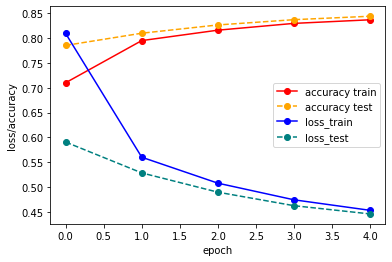

CNNNet(
  (_features): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
  )
  (_classifier): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=648, out_features=10, bias=True)
  )
)


In [7]:
# ex3. continue, plot the results
plot_loss_accuracy(cnn_df, marker='o', include_test=True)
# print(cnn_trainer.model)